In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
#%matplotlib notebook

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

from Cores import Cores

In [2]:
coreNames = ['B16', 'B17','B18','B19','B20','B21','B22','B23','B26','B27','B28','B29','B30']
DEPy = [False,False,True,True,True,False,True,True,False,False,False,False,False]
ECMy = [True,False,True,False,False,True,False,False,False,False,False,False,False]
idx = [0,2,3,4,5,6,7]
DEP_Names = ['B18','B19','B20','B22','B23']
ECM_Names = ['B16','B18','B21']
ECM_DEPCores = []

for i in idx:
    coreName = coreNames[i]
    dens = pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=coreName, index=False)
    d18O = pd.read_excel('Depth_d18O__Bcores.xlsx', sheet_name=coreName, index=False)
    
    if DEPy[i]:
        DEP = pd.read_excel('DepthDEP__BcoresClean.xlsx', sheet_name=coreName, index=False)
    else:
        DEP = []
    
    if ECMy[i]:
        ECM = pd.read_excel('DepthECM__B16_B18_B21.xlsx', sheet_name=coreName, index=False)
    else:
        ECM = []
    
    volcWE = np.asarray(pd.read_excel('VolcanicEruptions__WE_Depth.xlsx', 'Sheet1', usecols=[coreName]))
    ECM_DEPCores.append(Cores(name=coreName, df_dens=dens, df_d18O = d18O, df_ECM = ECM, df_DEP = DEP, volcWE = volcWE))

    
#coreName = 'B21'
#name1 = coreName
#df_dens1 = pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=coreName, index=False)
#df_d18O1 = pd.read_excel('Depth_d18O__Bcores.xlsx', sheet_name=coreName, index=False)
#df_ECM1 = pd.read_excel('DepthECM__B16_B18_B21.xlsx', sheet_name=coreName, index=False)
#df_DEP1 = []#pd.read_excel('DepthDEP__BcoresClean.xlsx', sheet_name=coreName, index=False)
#volcWE1 = np.asarray(pd.read_excel('VolcanicEruptions__WE_Depth.xlsx', 'Sheet1', usecols=[coreName]))

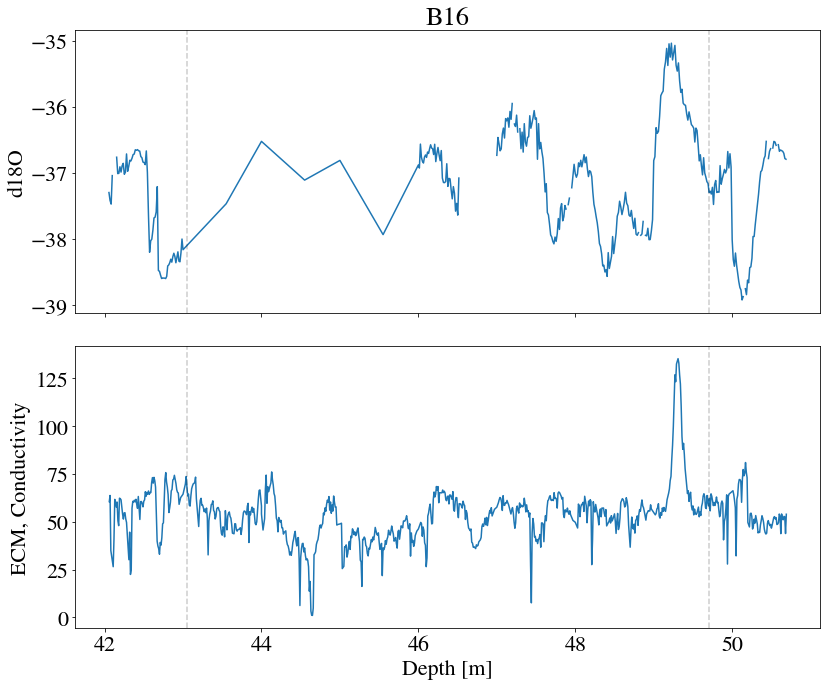

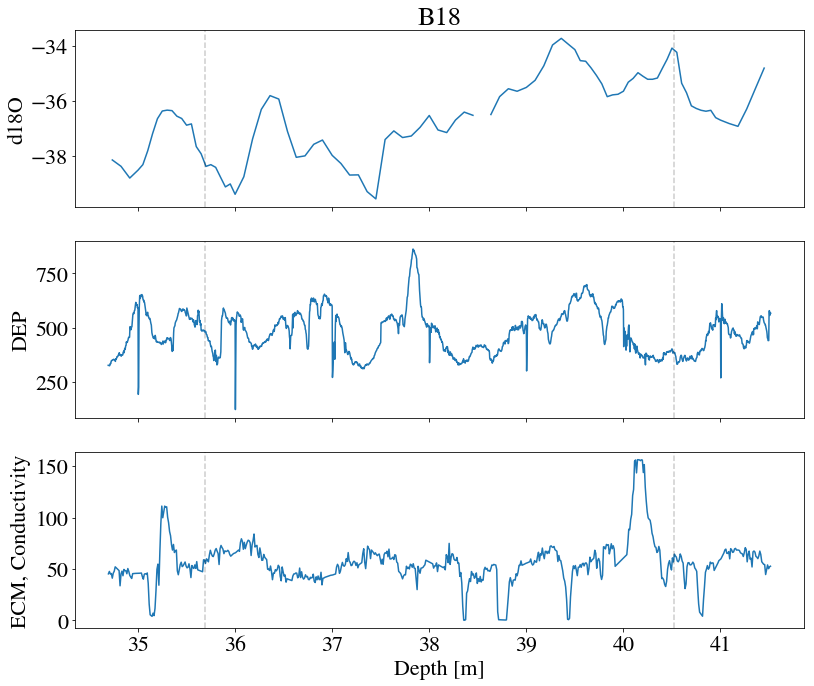

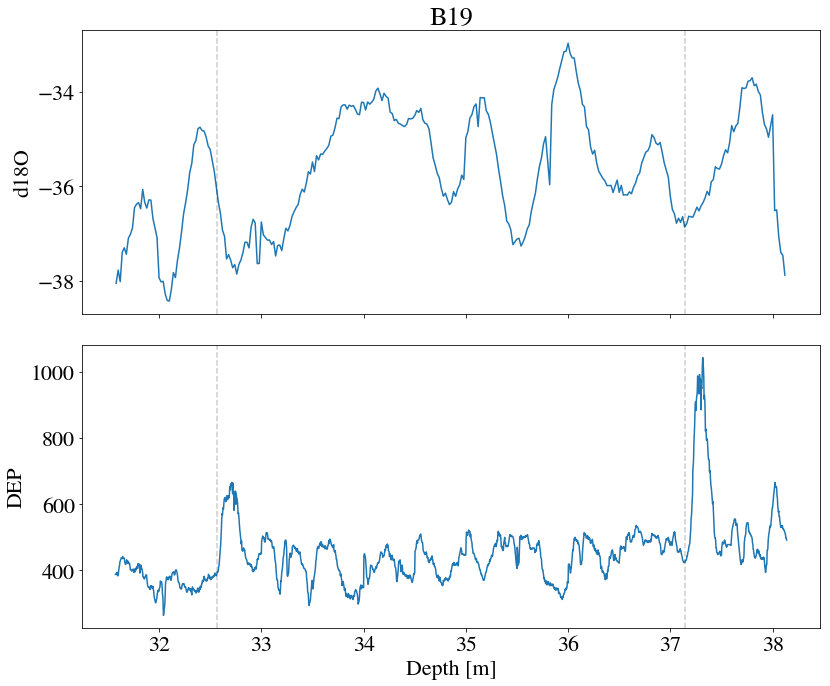

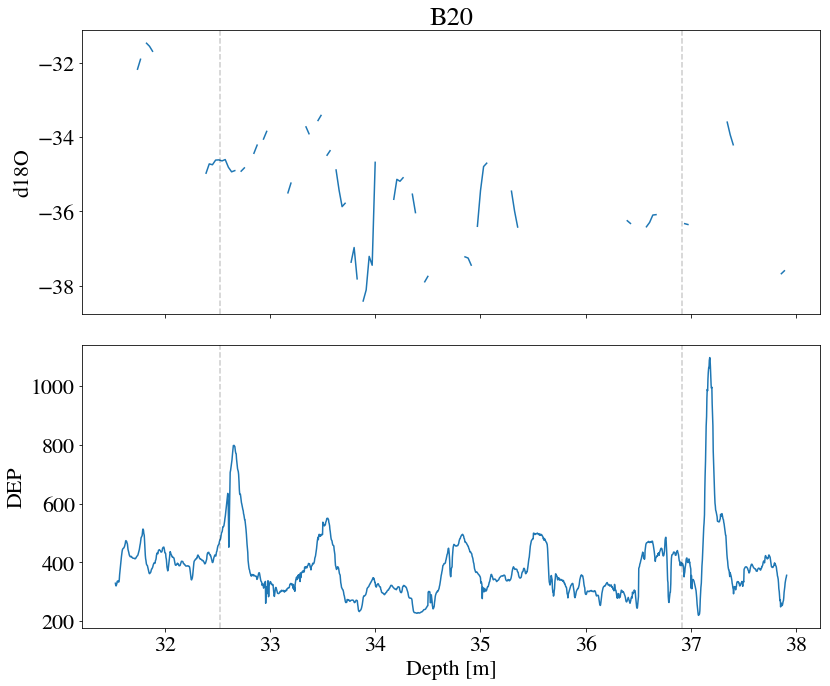

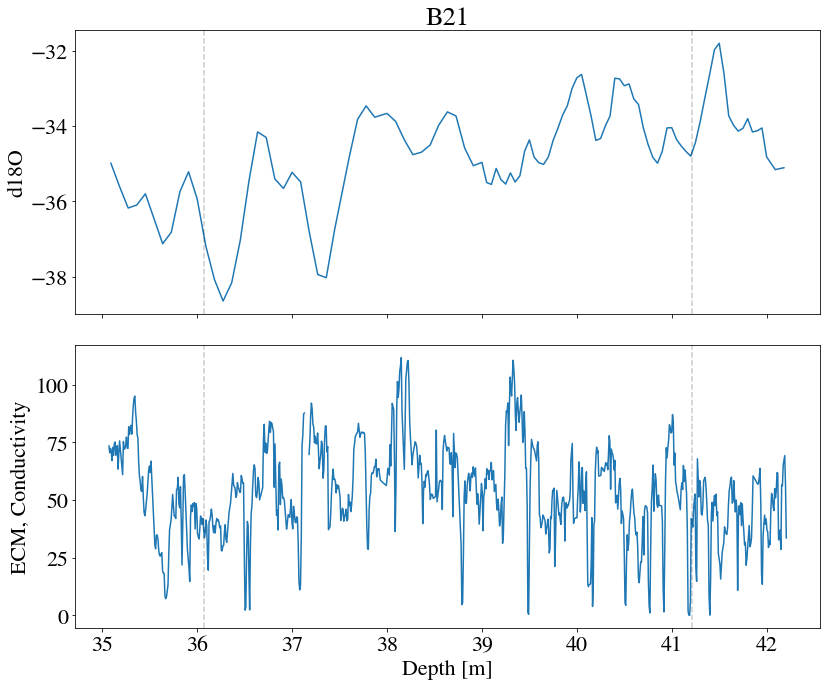

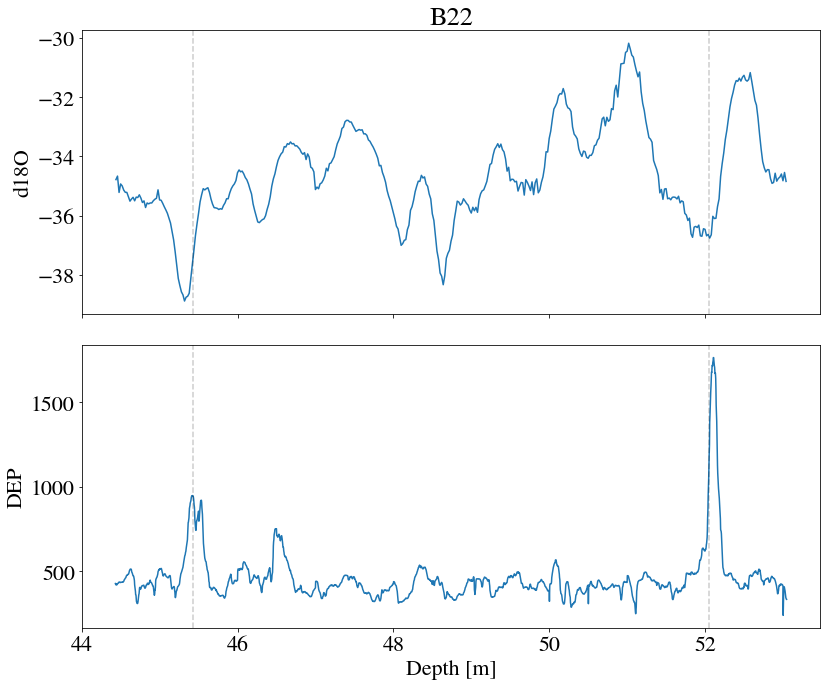

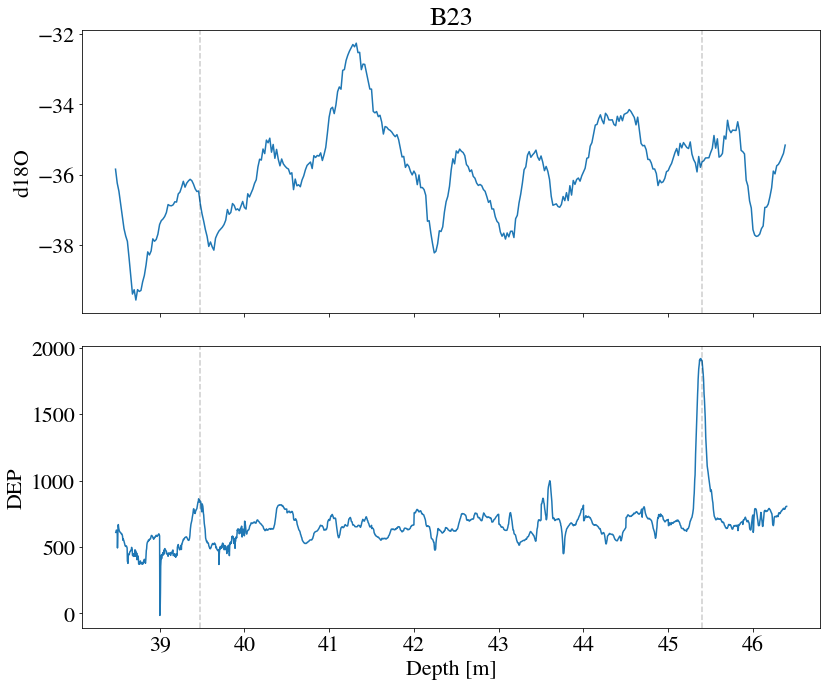

In [3]:
all_dfCores_LakiTambora = []
all_dfCoresPlot = []
for i in range(len(ECM_DEPCores)):
    all_dfCores_LakiTambora.append(ECM_DEPCores[i].getData_LakiToTambora(saveFig=True))
    all_dfCoresPlot.append(ECM_DEPCores[i].plotCore(plotFig=False,saveFig=False))
    